In [1]:
import pandas
import numpy
import matplotlib.pyplot as plotter
from pathlib import Path
import seaborn
from scipy.signal import *
from scipy.stats import probplot

In [2]:
data = Path("../data/summer_proc_test/")
files = list(data.iterdir())
print(files)

[PosixPath('../data/summer_proc_test/summer_proc_test_cpu.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_tx.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_rx.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_voltage.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_power.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_disk.csv')]


In [3]:
disk = pandas.read_csv(str(data/"summer_proc_test_disk.csv")).drop("Unnamed: 0", axis=1)
cpu = pandas.read_csv(str(data/"summer_proc_test_cpu.csv")).drop("Unnamed: 0", axis=1)
power = pandas.read_csv(str(data/"summer_proc_test_power.csv")).drop("Unnamed: 0", axis=1).fillna(0)
tx = pandas.read_csv(str(data/"summer_proc_test_tx.csv")).drop("Unnamed: 0", axis=1)
rx = pandas.read_csv(str(data/"summer_proc_test_rx.csv")).drop("Unnamed: 0", axis=1)

Apply median filtering to power signal

In [4]:
power = power.drop("Time", axis=1)
#power = medfilt(power.as_matrix().ravel(), 21)
power = pandas.DataFrame(power.as_matrix().ravel(), columns=["power"])
power.head()

,power
0,1381.097561
1,1381.097561
2,1591.056911
3,1598.170732
4,1591.463415


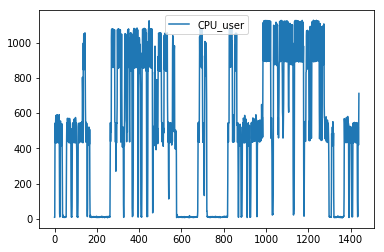

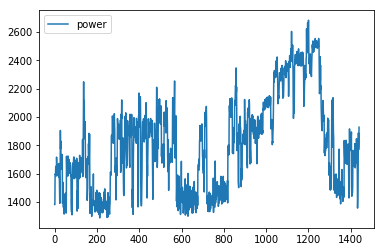

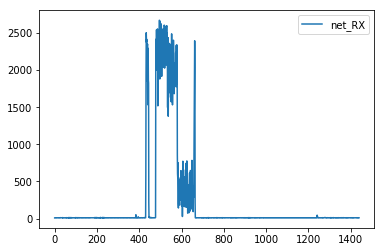

In [5]:
cpu.plot()
plotter.show()
power.plot()
plotter.show()
rx.plot()
plotter.show()

In [6]:
all_data = pandas.concat([cpu, tx, rx, disk, power], axis=1, join="inner").drop("Time", axis=1)
all_data.describe()

,CPU_user,net_TX,net_RX,disk_p2,power
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,503.303935,264.406250,211.630556,222.303241,1804.014651
std,399.552048,599.688124,606.191497,484.812885,332.300303
min,6.000000,12.000000,8.000000,0.000000,1286.585366
25%,13.666667,15.000000,8.000000,0.000000,1504.878049
50%,524.750000,20.000000,10.000000,0.000000,1784.756098
75%,879.875000,144.000000,10.500000,3.333333,2008.180894
max,1126.500000,2676.500000,2672.500000,3405.000000,2684.146341


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [8]:
columns = list(map(lambda x: x.split()[-1], list(all_data.columns)))
columns

['CPU_user', 'net_TX', 'net_RX', 'disk_p2', 'power']

In [9]:
scaler = MinMaxScaler()
pca = PCA(n_components=9)
all_data = pandas.DataFrame(scaler.fit_transform(all_data.fillna(0)), columns=columns)
power = all_data["power"]
data = all_data.drop("power", axis=1)
#data = pandas.DataFrame(pca.fit_transform(data.fillna(0)))
data["power"] = power
data.describe()

,CPU_user,net_TX,net_RX,disk_p2,power
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.443823,0.094729,0.076424,0.065287,0.370237
std,0.356584,0.225066,0.227507,0.142383,0.237772
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006842,0.001126,0.000000,0.000000,0.156195
50%,0.462963,0.003002,0.000751,0.000000,0.356457
75%,0.779897,0.049540,0.000938,0.000979,0.516325
max,1.000000,1.000000,1.000000,1.000000,1.000000


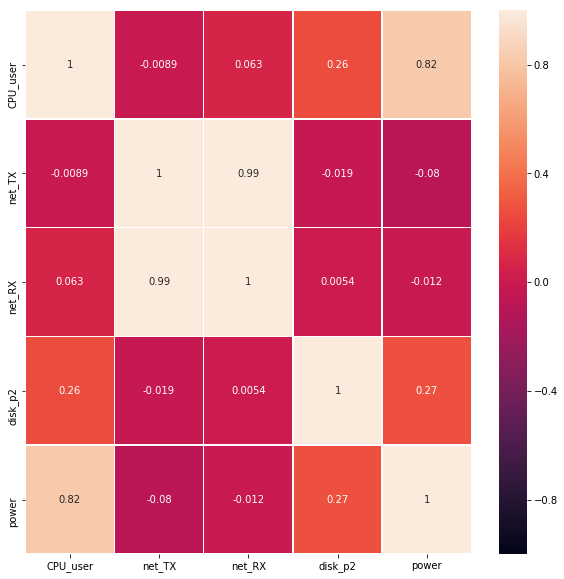

In [10]:
fig = plotter.figure(figsize=(10,10))
corr = data.corr()
seaborn.heatmap(corr, annot=True, vmin=-1.0, linewidths=0.5)
plotter.show()

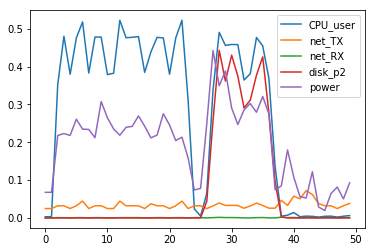

In [11]:
data[:50].plot()
plotter.show()

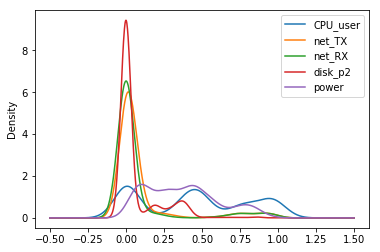

In [12]:
data.plot(kind="density")
plotter.show()

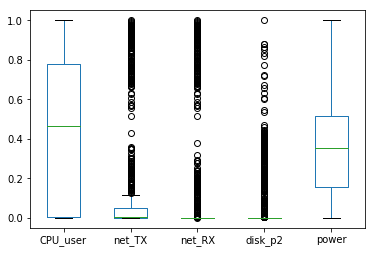

In [13]:
data.plot(kind="box")
plotter.show()

In [14]:
data.head(5)

,CPU_user,net_TX,net_RX,disk_p2,power
0,0.003124,0.024770,0.000000,0.0,0.067627
1,0.003124,0.024770,0.000000,0.0,0.067627
2,0.351926,0.032089,0.000751,0.0,0.217859
3,0.480292,0.032089,0.000751,0.0,0.222949
4,0.379741,0.024770,0.000000,0.0,0.218150
